In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_data_file = "CSI_data.csv"

train_data = pd.read_csv(train_data_file, encoding='utf-8')


# 查看信息

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20480000 entries, 0 to 20479999
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User_ID         int64  
 1   Time_TTI        int64  
 2   Tx_Antenna      int64  
 3   Rx_Antenna      int64  
 4   Resource_Block  int64  
 5   CSI_Real        float64
 6   CSI_Imag        float64
dtypes: float64(2), int64(5)
memory usage: 1.1 GB


In [6]:
train_data.describe()

,User_ID,Time_TTI,Tx_Antenna,Rx_Antenna,Resource_Block,CSI_Real,CSI_Imag
count,2.048000e+07,2.048000e+07,2.048000e+07,2.048000e+07,2.048000e+07,2.048000e+07,2.048000e+07
mean,4.995000e+02,9.500000e+00,1.550000e+01,1.500000e+00,3.500000e+00,-1.034614e-06,-1.679913e-06
std,2.886750e+02,5.766281e+00,9.233093e+00,1.118034e+00,2.291288e+00,3.032017e-03,3.026443e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.970288e-02,-2.664662e-02
25%,2.497500e+02,4.750000e+00,7.750000e+00,7.500000e-01,1.750000e+00,-1.385919e-03,-1.378459e-03
50%,4.995000e+02,9.500000e+00,1.550000e+01,1.500000e+00,3.500000e+00,-5.318113e-08,1.514571e-06
75%,7.492500e+02,1.425000e+01,2.325000e+01,2.250000e+00,5.250000e+00,1.383215e-03,1.374776e-03
max,9.990000e+02,1.900000e+01,3.100000e+01,3.000000e+00,7.000000e+00,2.695724e-02,2.838827e-02


In [7]:
train_data.head()

,User_ID,Time_TTI,Tx_Antenna,Rx_Antenna,Resource_Block,CSI_Real,CSI_Imag
0,0,0,0,0,0,0.003427,0.000802
1,0,0,0,0,1,0.003561,0.000914
2,0,0,0,0,2,0.003604,0.000824
3,0,0,0,0,3,0.003568,0.000750
4,0,0,0,0,4,0.003440,0.000848


# 绘制箱型图

<AxesSubplot:xlabel='CSI_Real'>

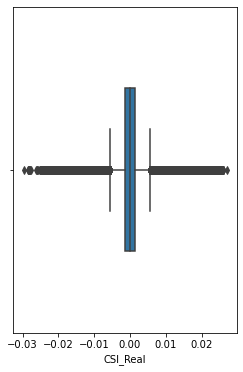

In [9]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['CSI_Real'],orient="v", width=0.5)

<AxesSubplot:xlabel='CSI_Imag'>

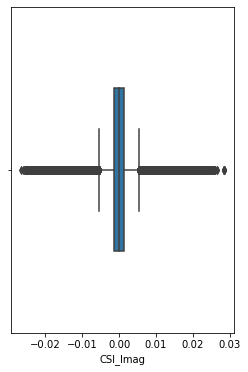

In [10]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['CSI_Imag'],orient="v", width=0.5)

<AxesSubplot:xlabel='Tx_Antenna'>

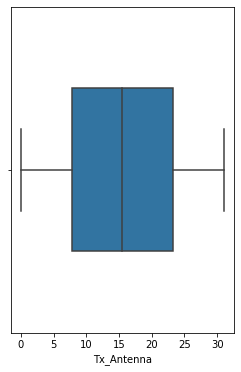

In [11]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['Tx_Antenna'],orient="v", width=0.5)

<AxesSubplot:xlabel='Rx_Antenna'>

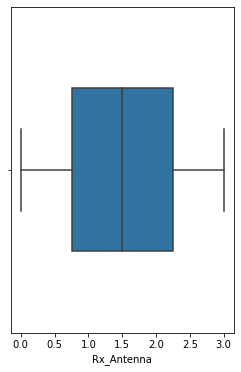

In [13]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['Rx_Antenna'],orient="v", width=0.5)

<AxesSubplot:xlabel='Resource_Block'>

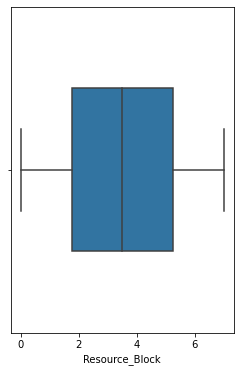

In [12]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['Resource_Block'],orient="v", width=0.5)

<AxesSubplot:xlabel='Time_TTI'>

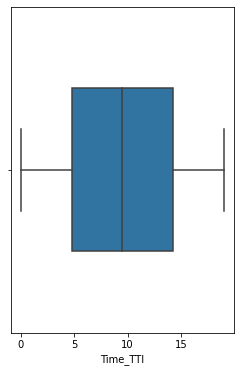

In [14]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['Time_TTI'],orient="v", width=0.5)

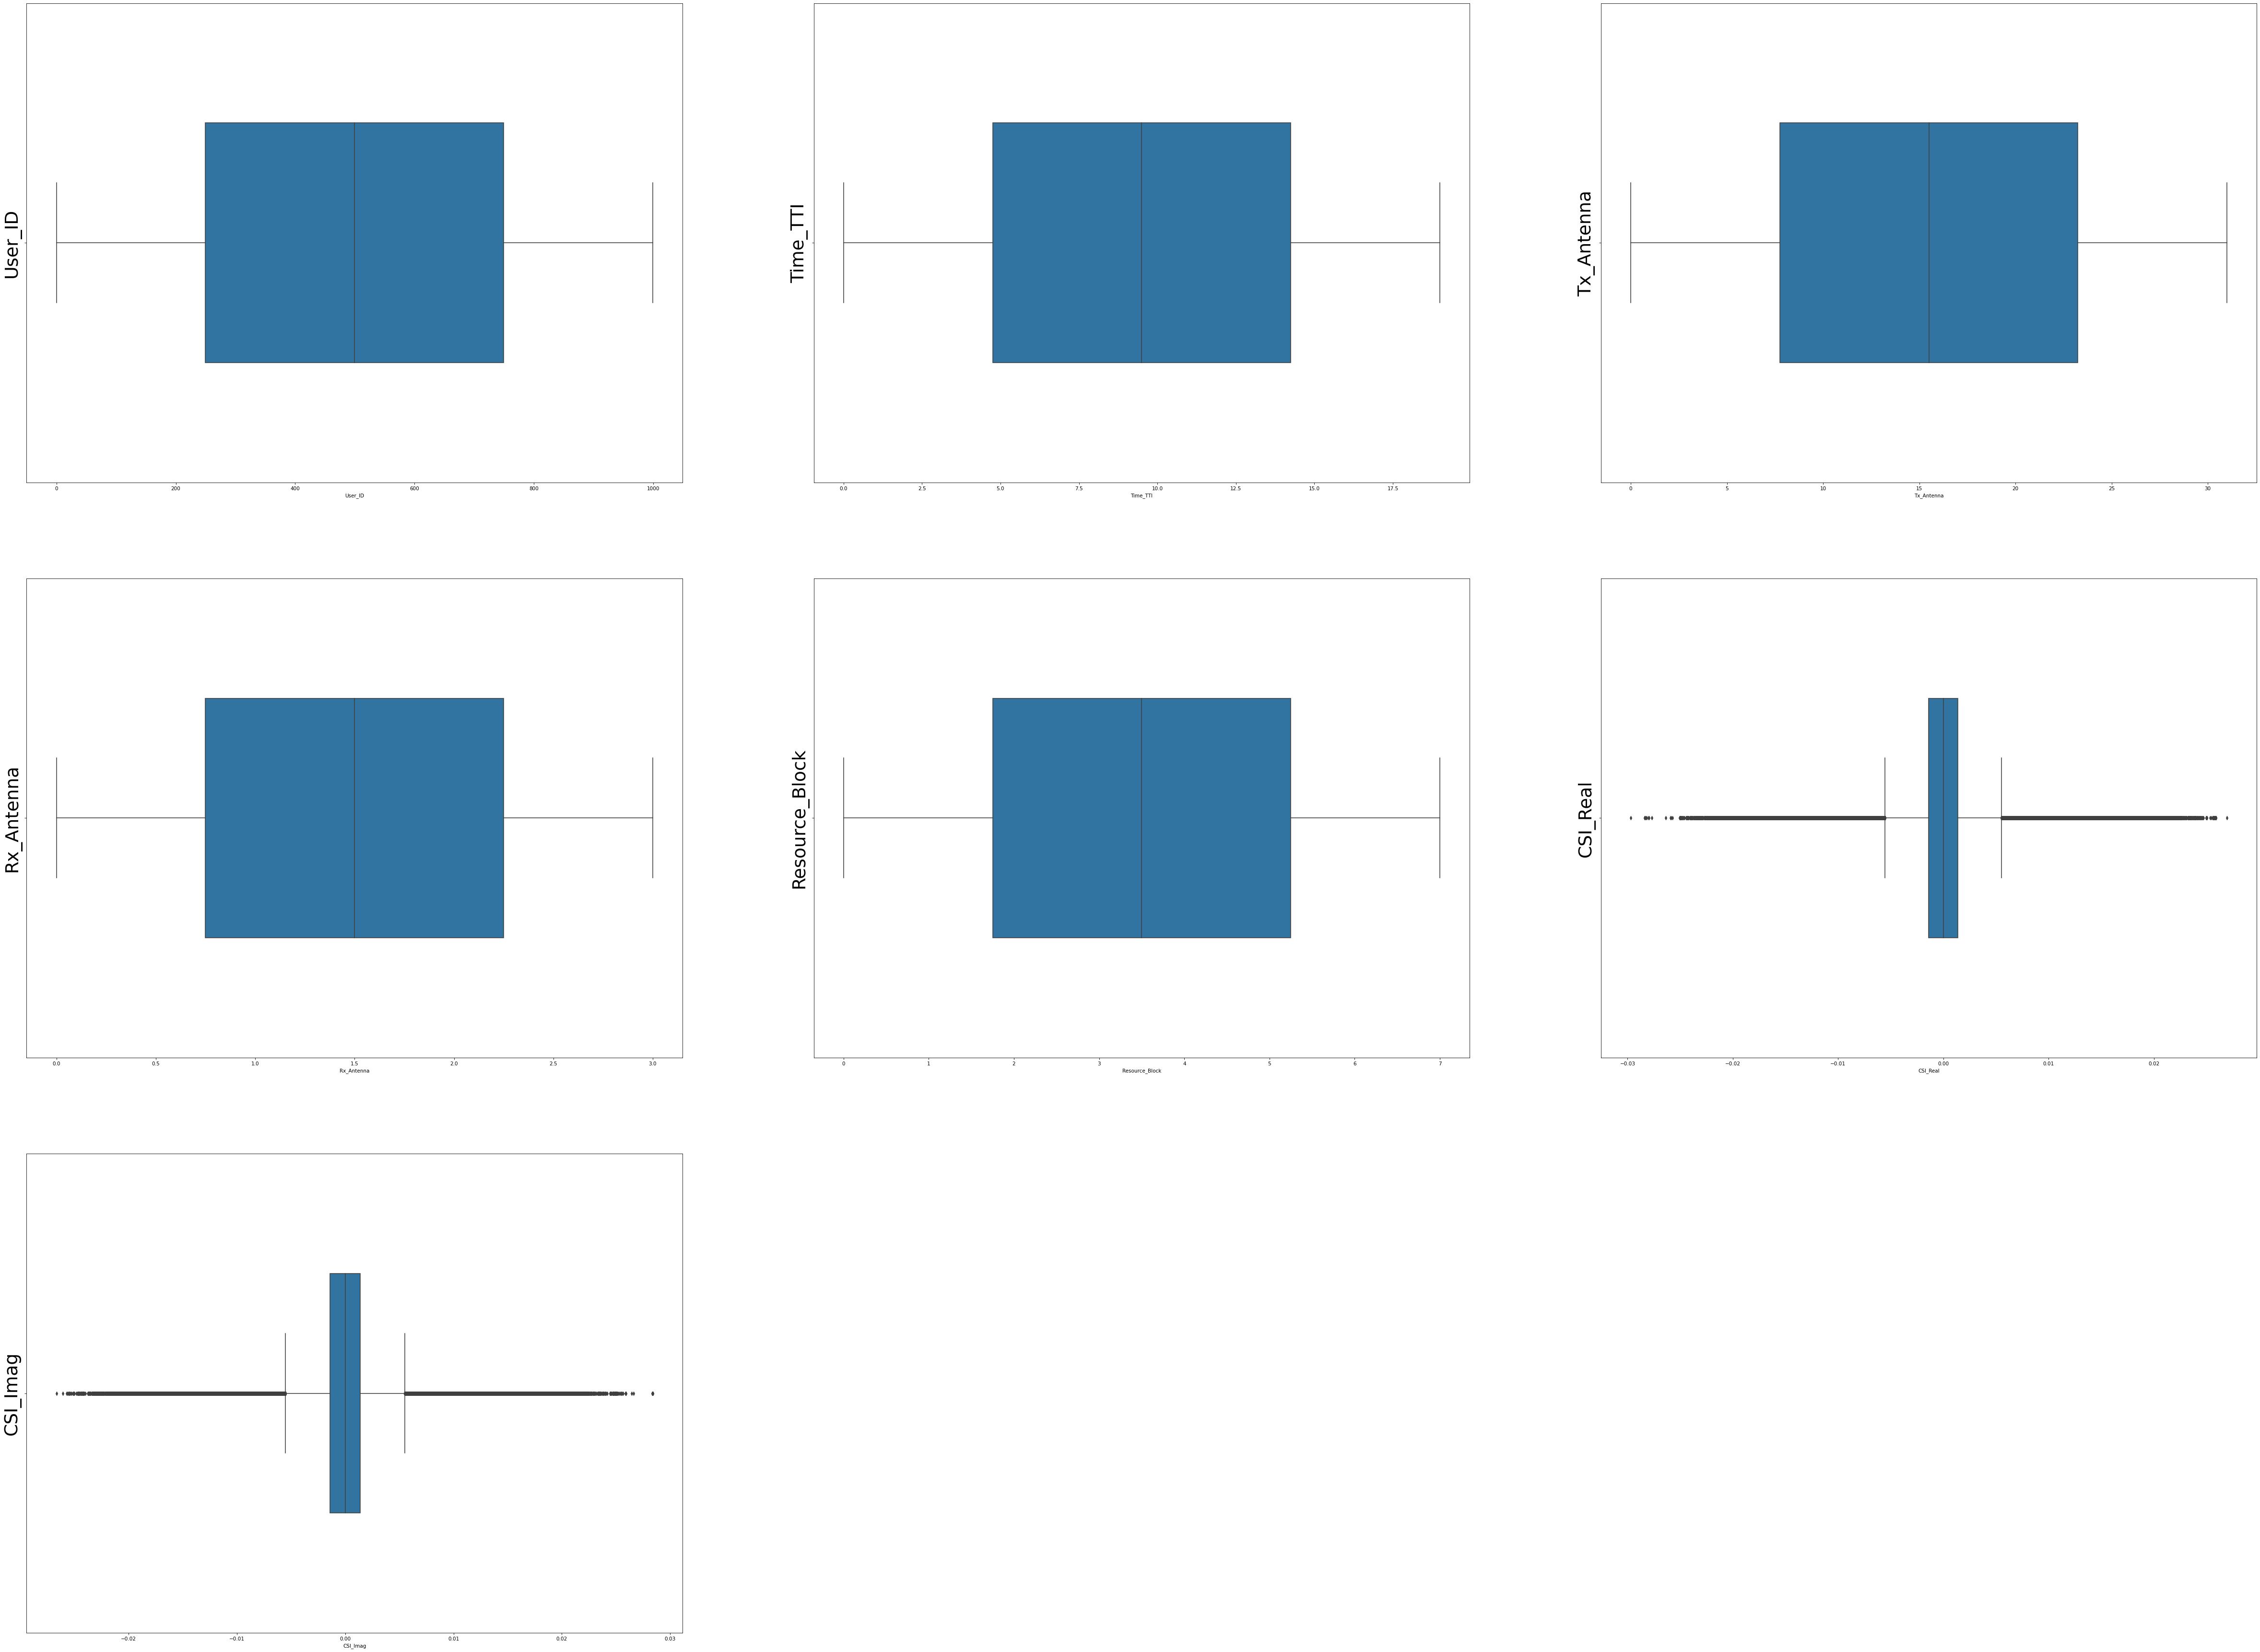

In [16]:
column = train_data.columns.tolist()[:7]  # 列表头
fig = plt.figure(figsize=(80, 60), dpi=75)  # 指定绘图对象宽度和高度
for i in range(7):
    plt.subplot(3,3, i + 1)  # 13行3列子图
    sns.boxplot(train_data[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=36)
plt.show()

# 异常值函数

In [17]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

R2= 9.021021795674322e-06
mse= 9.159273057997677e-06
---------------------------------------
mean of residuals: -2.7852908171597904e-19
std of residuals: 0.0030264291673897563
---------------------------------------
286030 outliers:
[307240, 307241, 307242, 307368, 307376, 307664, 307665, 307666, 307667, 307668, 307680, 307681, 307696, 307697, 307698, 307699, 307700, 307701, 307702, 307703, 307720, 307721, 307722, 307723, 307724, 307725, 307726, 307727, 307728, 307736, 307737, 307738, 307739, 307740, 307741, 307742, 307743, 307752, 307753, 307754, 307755, 307756, 307757, 307758, 307759, 307760, 307761, 307762, 307763, 307768, 307769, 307770, 307771, 307772, 307773, 307774, 307775, 308032, 308033, 308034, 308035, 308036, 308037, 308041, 308042, 308043, 308044, 308045, 308046, 308047, 308048, 308049, 308050, 308051, 308052, 308053, 308054, 308055, 308061, 308062, 308063, 308064, 308065, 308066, 308067, 308068, 308069, 308070, 308071, 308073, 308074, 308075, 308076, 308077, 308078, 308079

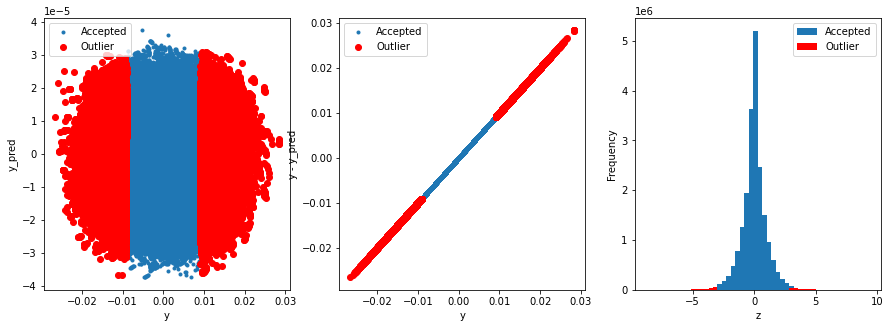

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train=train_data.iloc[:,0:-1]
y_train=train_data.iloc[:,-1]
outliers = find_outliers(Ridge(), X_train, y_train)

# V0直方图和Q-Q图

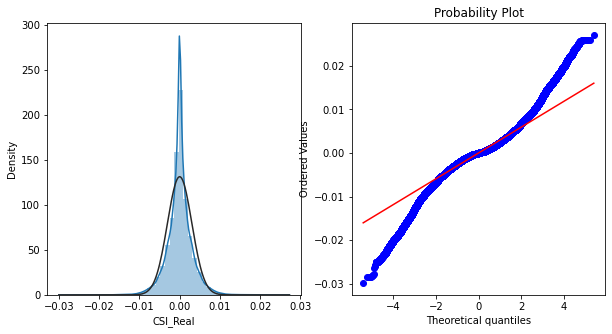

In [19]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(train_data['CSI_Real'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(train_data['CSI_Real'], plot=plt)

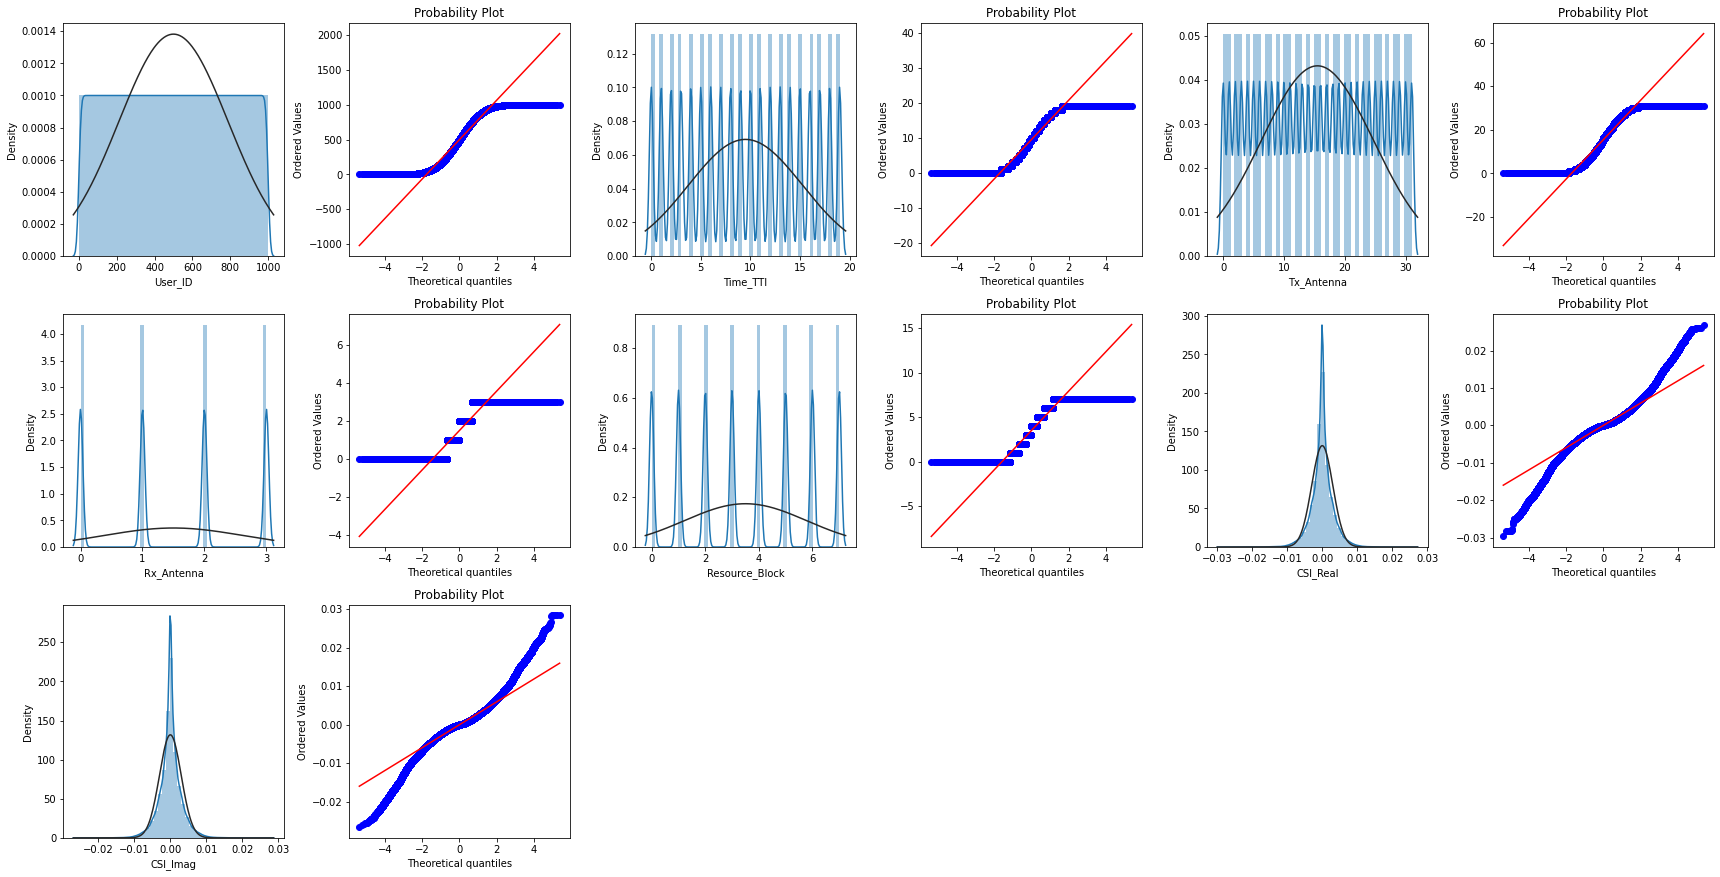

In [20]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols,4*train_rows))

i=0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.tight_layout()
plt.show()

# KDA分布图

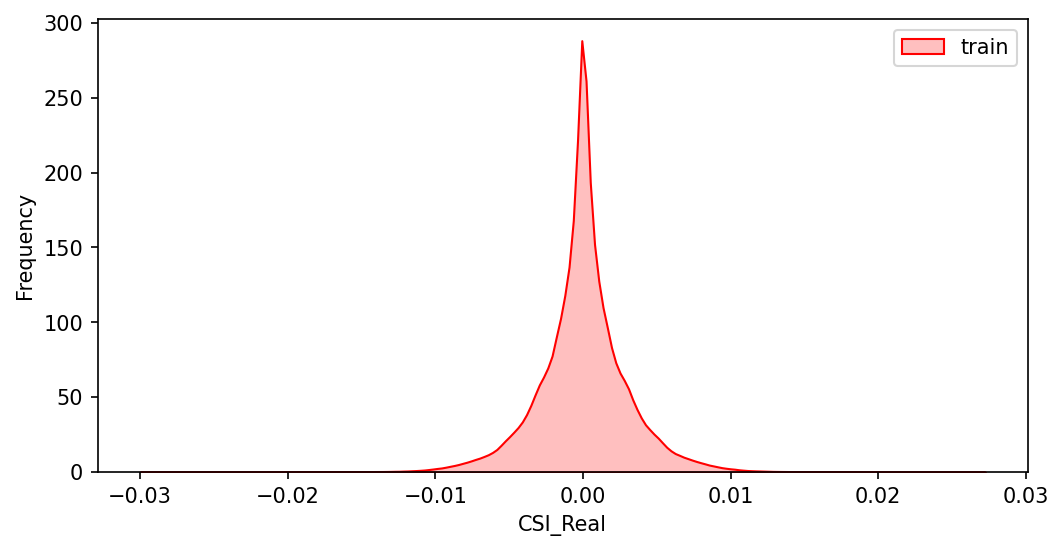

In [21]:
plt.figure(figsize=(8,4),dpi=150)
ax = sns.kdeplot(train_data['CSI_Real'], color="Red", shade=True)
# ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)
ax.set_xlabel('CSI_Real')
ax.set_ylabel("Frequency")
ax = ax.legend(["train"])

In [ ]:
fcols = 6
frows = len(train_data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='CSI_Real', data=train_data, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

KeyboardInterrupt: 

# 特征变量相关系数

In [4]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
# data_train1 = train_data.drop(['V5', 'V9', 'V11', 'V17', 'V22', 'V28'], 
#                               axis=1)
train_corr = train_data.corr()
train_corr

,User_ID,Time_TTI,Tx_Antenna,Rx_Antenna,Resource_Block,CSI_Real,CSI_Imag
User_ID,1.000000e+00,2.394898e-14,3.206038e-15,1.683677e-13,-5.849902e-14,-0.000391,-0.000597
Time_TTI,2.394898e-14,1.000000e+00,-1.734886e-17,1.366845e-16,-1.300904e-17,-0.000660,-0.002725
Tx_Antenna,3.206038e-15,-1.734886e-17,1.000000e+00,4.484323e-18,9.171151e-19,0.001322,-0.000019
Rx_Antenna,1.683677e-13,1.366845e-16,4.484323e-18,1.000000e+00,-6.552265e-19,0.000653,0.000693
Resource_Block,-5.849902e-14,-1.300904e-17,9.171151e-19,-6.552265e-19,1.000000e+00,-0.000018,-0.000092
CSI_Real,-3.908213e-04,-6.595274e-04,1.321846e-03,6.532773e-04,-1.822424e-05,1.000000,-0.000863
CSI_Imag,-5.968620e-04,-2.725248e-03,-1.857313e-05,6.932458e-04,-9.181663e-05,-0.000863,1.000000


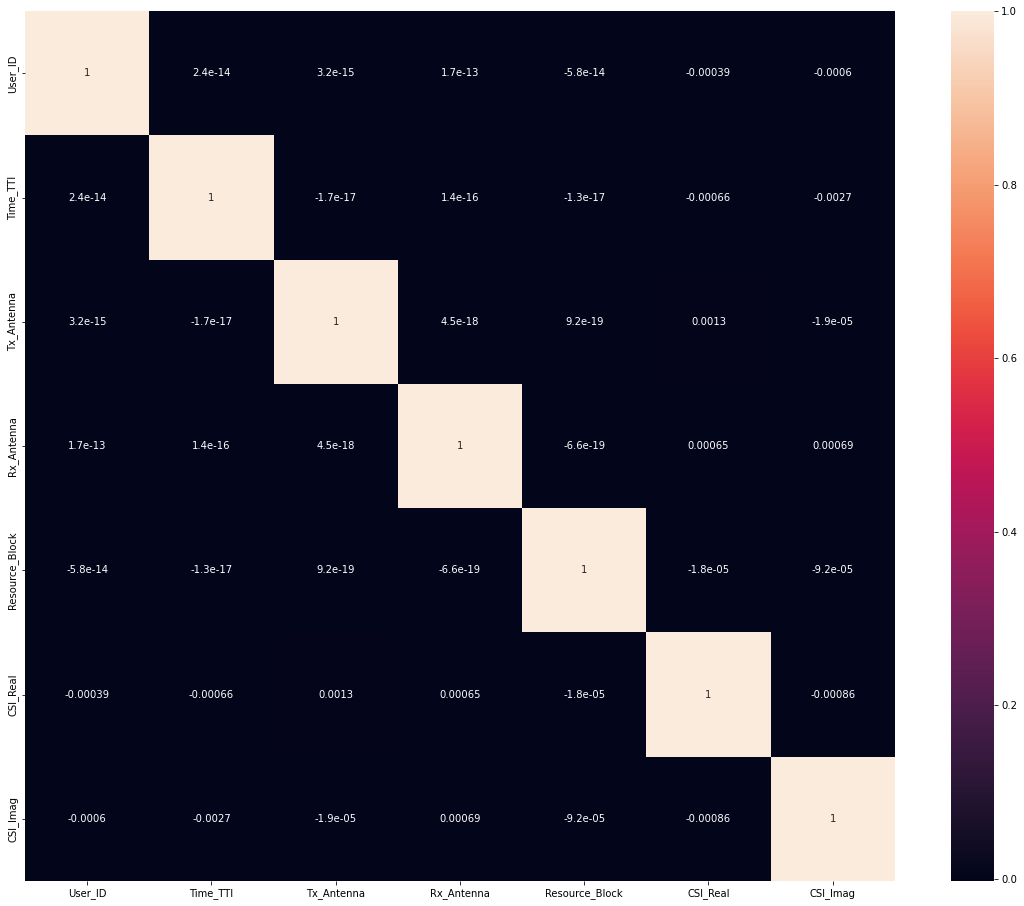

In [6]:
ax = plt.subplots(figsize=(20, 16))#调整画布大小
ax = sns.heatmap(train_corr,square=True, annot=True)#画热力图   annot=True 显示系数

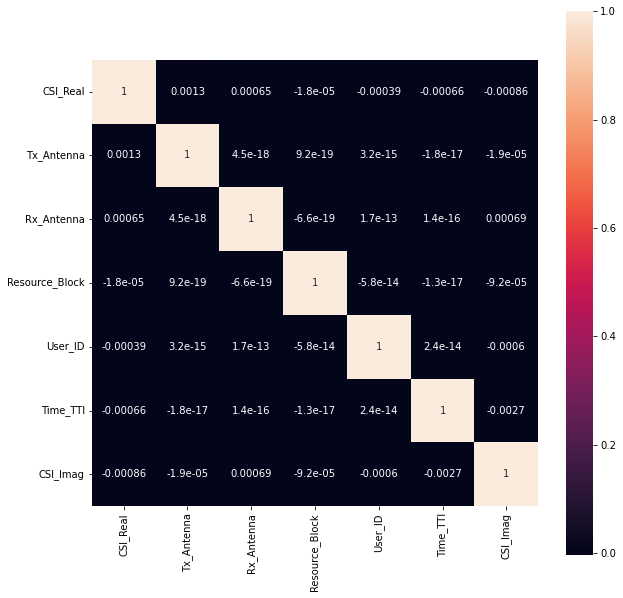

In [8]:
k = 7  # number of variables for heatmap
cols = train_corr.nlargest(k, 'CSI_Real')['CSI_Real'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))  #调整画布大小
hm = sns.heatmap(train_data[cols].corr(), annot=True, square=True)
plt.show()